# Ferramentas para a solução do desafio 1

## Neste kernel será construido o autoencoder que fará a limpeza do conteudo das imagens
## Para tal, fora necessário baixar um dataset no kaggle com as imagens sujas e limpas para treinar o autoencoder
## Segue o link: https://www.kaggle.com/c/denoising-dirty-documents

In [1]:
## Importando as bibliotecas
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from utils import Autoencoder, load_image, train_val_split
from glob import glob
from PIL import Image
import cv2

In [2]:
## Verificando o tamanho da imagem e armazenando na variável img_shape

img_shape = cv2.imread('x_train/101.png').shape
print(img_shape)

(336, 432, 3)


In [3]:
## Selecionando otimizador Adam

optimizer = Adam(lr=1e-4)

#https://arxiv.org/abs/1412.6980

In [4]:
## O autoencoder deve possuir, em sua entrada, as mesmas dimensões que da imagem
## Aqui o unico tratamento é que as imagens terão somente 1 canal de cor, visando um menor custo computacional
autoencoder_model = Autoencoder(img_shape, optimizer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 336, 432, 1)]     0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 336, 432, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 168, 216, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 168, 216, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 84, 216, 64)       0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 84, 216, 64)       36928     
______________________________________________

In [5]:
# Selecionando as imagens para treino (X=TRAIN_IMAGES, y=CLEAN_IMAGES)
# Selecionando as imagens para teste
TRAIN_IMAGES = glob('x_train/*.png')
CLEAN_IMAGES = glob('y_train/*.png')
TEST_IMAGES = glob('x_test/*.png')

In [6]:
# Carregando as imagens nas variaveis x_train e y_train
x_train = load_image(TRAIN_IMAGES, img_shape)
y_train = load_image(CLEAN_IMAGES, img_shape)

In [7]:
# Separando os dados de treino em treino e validação, com o proposito de realizar uma verificação em tempo de execução
# Verificando as dimensões de x_train, x_val

x_train, y_train, x_val, y_val = train_val_split(x_train, y_train)
print(x_train.shape, x_val.shape)

# formato das dimensões: (num_imagens, altura, largura, canais)

(115, 336, 432, 1) (29, 336, 432, 1)


Train on 115 samples, validate on 29 samples
Epoch 1/500
115/115 [==============================] - 4s 39ms/sample - loss: 0.1037 - val_loss: 0.0699
Epoch 2/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0611 - val_loss: 0.0487
Epoch 3/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0456 - val_loss: 0.0416
Epoch 4/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0372 - val_loss: 0.0339
Epoch 5/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0326 - val_loss: 0.0315
Epoch 6/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0304 - val_loss: 0.0295
Epoch 7/500
115/115 [==============================] - 2s 16ms/sample - loss: 0.0286 - val_loss: 0.0275
Epoch 8/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0272 - val_loss: 0.0264
Epoch 9/500
115/115 [==============================] - 2s 15ms/sample - loss: 0.0259 - val_loss: 0.0265
Epoch 10/500
115/11

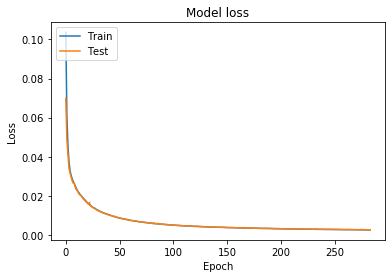

Saving model on: weights/saved_model.h5


In [8]:
# Realizando o treinamento e salvando o modelo na pasta weights
filepath = 'weights/saved_model.h5'
autoencoder_model.train_model(x_train, y_train, x_val, y_val, epochs=500, batch_size=1, dir_save_model=filepath)

In [9]:
# Carregando as imagens de teste
TEST_IMAGES = glob('x_test/*.png')
x_test = load_image(TEST_IMAGES, img_shape)

In [10]:
# Realizando a predição
preds = autoencoder_model.eval_model(x_test)

In [11]:
# Escolhendo a imagem no vetor dos resultados armazenado na variavel preds
index = 0

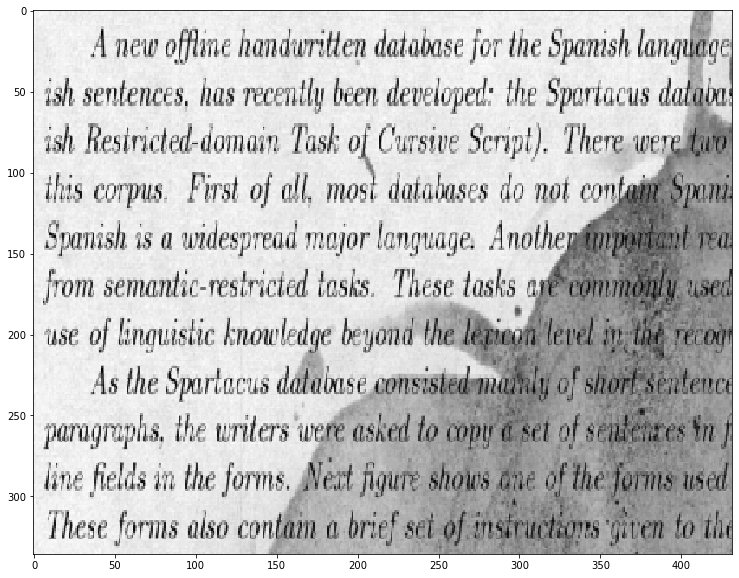

In [12]:
# Importando biblioteca de visualização
import matplotlib.pyplot as plt

# Setando o tamanho da imagem
plt.figure(figsize=(15, 10))

# Como a saída do autoencoder é possui ativação sigmoid, ou seja, que varia de 0 a 1
# Realizamos um preprocessamento multiplicando os resultados por 255, que é o range de cores não normalizado
x_test_0 = x_test[index] * 255.0

# Printando imagem
x_test_0 = x_test_0.reshape(336, 432)
plt.imshow(x_test_0, cmap='gray')

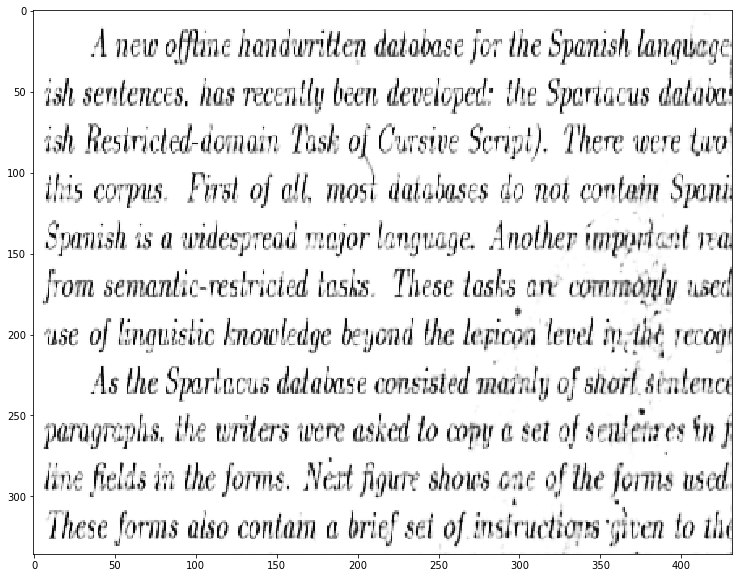

In [13]:
# Nesta celula, se observa que mesmo em casos mais danificados, o autoencoder consegue se sair bem.

plt.figure(figsize=(15, 10))
preds_0 = preds[index] * 255.0
preds_0 = preds_0.reshape(336, 432)
plt.imshow(preds_0, cmap='gray')